In [12]:
import math
def f(x):
    return math.exp(-(x**2/2))
def compositeTrapezoid(n,a,b):
    h = (b-a)/n
    sum = 0
    for i in range(1,n):
        sum += f(a + i*h)
    return (1/2)*h*(f(a) + 2*sum + f(b))

def RombergsMethod(n,a,b, Rombergs_tab):
    new_R_tab = [compositeTrapezoid(n,a,b)]
    for r in range(len(Rombergs_tab)):
        new_R_tab.append(1/(4**(r+1) - 1) * ((4**(r+1)) * (new_R_tab[r]) - Rombergs_tab[r]))
    Rombergs_tab = new_R_tab
    return Rombergs_tab

In [37]:
def I(x,experiment = True):
    a,b = 0,x
    N = 2 # N + 1 is number of points between (a,b) to error less than 10^(-8)
    # We want to have N as a power of 2
    bound = math.sqrt(((b-a)**3)/12) * 10**4
    while N < bound:
        N *= 2
    if(experiment):
        print("Minimum N required for given error:",N)
        print("Composite Trapezoid for", N, "subsets:", compositeTrapezoid(N,a,b))
    Rombergs_tab = []
    i = 1
    while i <= N:
        Rombergs_tab = RombergsMethod(i,a,b,Rombergs_tab)
        i *= 2
    if (not experiment):
        return Rombergs_tab[-1]
    print("Romberg's method for", N, "subsets:", Rombergs_tab[-1],'\n')
    Rombergs_tab = []
    # Just for experiment with results of 2 methods
    for n in [2**i for i in range(15)]:
        Rombergs_tab = RombergsMethod(n,a,b,Rombergs_tab)
        if n >= (2**10):
            print("Composite Trapezoid for", n, "subsets:", compositeTrapezoid(N,a,b))
            print("Romberg's method for", n, "subsets:", Rombergs_tab[-1])

In [40]:
def phi(t):
    if t >= 0:
        return 1/2 + 1/(math.sqrt(2 * math.pi)) * I(t,False)
    else:
        return 1/2 - 1/(math.sqrt(2 * math.pi)) * I(-t,False)

In [47]:
I(0.2)

Minimum N required for given error: 512
Composite Trapezoid for 512 subsets: 0.19867462622631904
Romberg's method for 512 subsets: 0.19867462871909305 

Composite Trapezoid for 1024 subsets: 0.19867462622631904
Romberg's method for 1024 subsets: 0.19867462871909328
Composite Trapezoid for 2048 subsets: 0.19867462622631904
Romberg's method for 2048 subsets: 0.19867462871909292
Composite Trapezoid for 4096 subsets: 0.19867462622631904
Romberg's method for 4096 subsets: 0.19867462871909317
Composite Trapezoid for 8192 subsets: 0.19867462622631904
Romberg's method for 8192 subsets: 0.19867462871909328
Composite Trapezoid for 16384 subsets: 0.19867462622631904
Romberg's method for 16384 subsets: 0.19867462871909214


In [48]:
I(2)

Minimum N required for given error: 8192
Composite Trapezoid for 8192 subsets: 1.1962880119781758
Romberg's method for 8192 subsets: 1.1962880133226144 

Composite Trapezoid for 1024 subsets: 1.1962880119781758
Romberg's method for 1024 subsets: 1.1962880133226106
Composite Trapezoid for 2048 subsets: 1.1962880119781758
Romberg's method for 2048 subsets: 1.196288013322609
Composite Trapezoid for 4096 subsets: 1.1962880119781758
Romberg's method for 4096 subsets: 1.1962880133226013
Composite Trapezoid for 8192 subsets: 1.1962880119781758
Romberg's method for 8192 subsets: 1.1962880133226144
Composite Trapezoid for 16384 subsets: 1.1962880119781758
Romberg's method for 16384 subsets: 1.1962880133226068


In [49]:
phi(-2)

0.02275013194817671

In [54]:
phi(1.2)

0.8849303297782914

In [51]:
phi(0.2)

0.579259709439103

In [53]:
phi(3)

0.9986501019683678

In [55]:
phi(5)

0.9999997133484154

In [56]:
phi(8)

0.9999999999999609

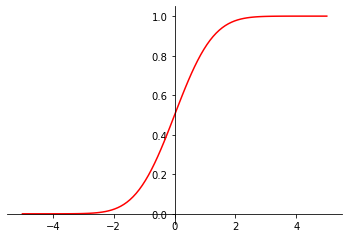

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function
y = [phi(xi) for xi in x]

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()